In [1]:
import pandas as pd

df= pd.read_csv("access.log",sep='\s+',engine = 'python',usecols=[0,1,2,3,4,5,6,7,8,9],names=['time', 'duration', 'Ip.address', 'status', 'size_in_bytes', 'requests','URL','user','hierarchy_code','type'])
# import csv

# txt_file = r"access.Log"
# csv_file = r"mycsv.csv"

# # use 'with' if the program isn't going to immediately terminate
# # so you don't leave files open
# # the 'b' is necessary on Windows
# # it prevents \x1a, Ctrl-z, from ending the stream prematurely
# # and also stops Python converting to / from different line terminators
# # On other platforms, it has no effect
# in_txt = csv.reader(open(txt_file, "rb"), delimiter = ' ')
# out_csv = csv.writer(open(csv_file, 'wb'))

# out_csv.writerows(in_txt)

In [2]:
df.head(5)

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code,type
0,1.531719e+09,4,192.168.62.40,TCP_DENIED/407,4118,GET,http://info.kingsoftstore.com/wpsv6internet/in...,-,NONE/-,text/html
1,1.531719e+09,4,192.168.149.69,TCP_DENIED/407,4302,GET,http://www.google.com/cse/cse.js?,-,NONE/-,text/html
2,1.531719e+09,298,192.168.156.39,TCP_DENIED/407,4378,GET,http://au.download.windowsupdate.com/c/msdownl...,-,NONE/-,text/html
3,1.531719e+09,299,10.4.10.49,TCP_DENIED/407,3783,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html
4,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html


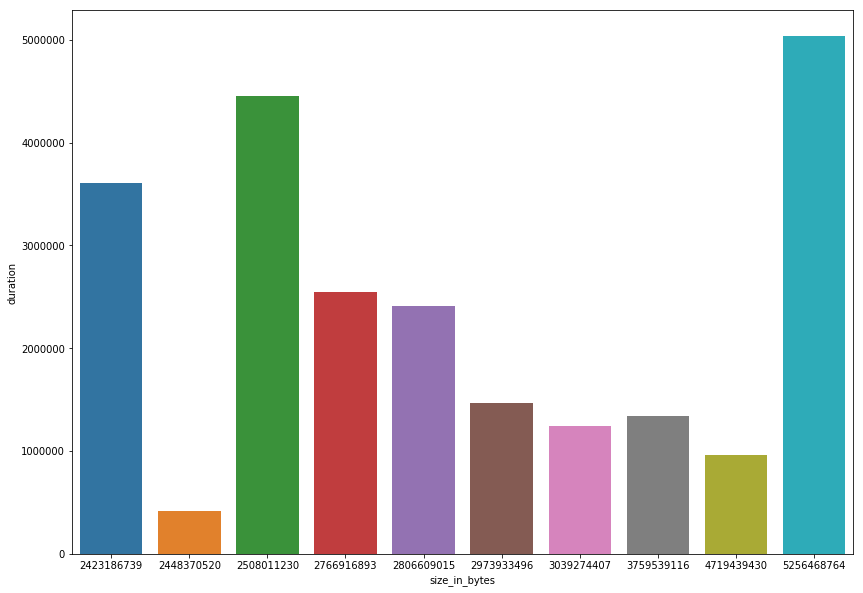

In [10]:
size10= df.sort_values('size_in_bytes',ascending=False).head(10)
# top 10 domain hits with maximum size and corresponding duration


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.barplot(x='size_in_bytes', y='duration', data=size10)
plt.show()

In [4]:
df.isnull().sum()

time                 0
duration             0
Ip.address           0
status               0
size_in_bytes        0
requests             0
URL                  0
user              4510
hierarchy_code       0
type               616
dtype: int64

In [13]:
df.shape[0]

6749991

In [14]:
df.nunique()
# df[df['user']=='DIRECT/63.140.44.241']

time              5598578
duration           385216
Ip.address           1972
status                 72
size_in_bytes      484438
requests              106
URL                156904
user                 1816
hierarchy_code      36854
dtype: int64

In [15]:
df = df[df['user'].notnull()]

In [8]:
df=df.drop(['type'],axis=1)


In [16]:
df[df['URL']== 'www.mathworks.com:443']
df[df['user']=='-']


,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code


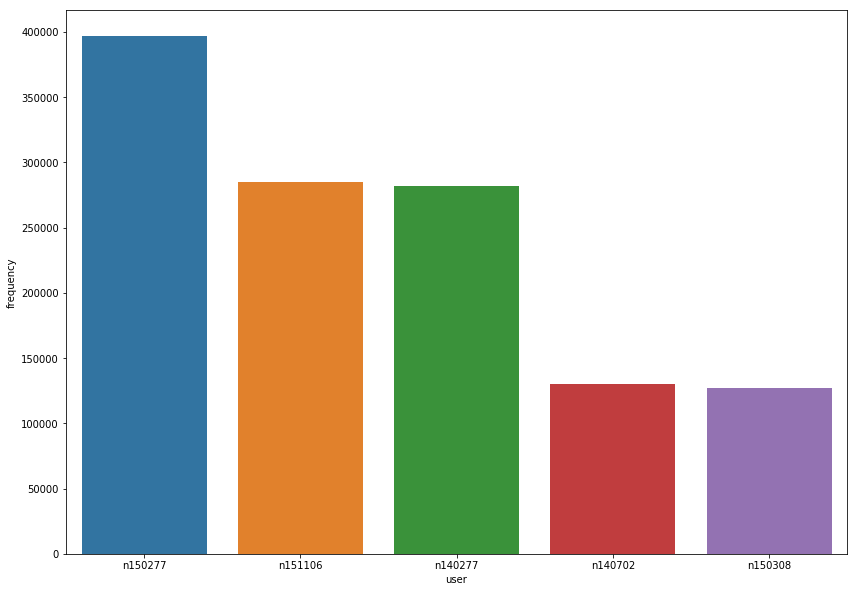

In [17]:
df1=df[df['user']!='-']
# top5=df.groupby('user').count().reset_index()
# top5= top5.sort_values
top5 = df1['user'].value_counts().head(5)

Frame=pd.DataFrame(top5)
Frame['frequency']=Frame['user']
Frame = Frame.reset_index()
Frame=Frame.drop(['user'],axis=1)
Frame.columns=['user','frequency']
Frame
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.barplot(x='user', y='frequency', data=Frame)
plt.show()

In [19]:
df[df['user']=='DIRECT/63.140.44.241']

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code


In [18]:


df

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code
16,1.531719e+09,55,192.168.156.39,TCP_MISS/206,6770,GET,http://au.download.windowsupdate.com/c/msdownl...,n150388,DIRECT/13.107.4.50
19,1.531719e+09,431,192.168.152.100,TCP_MISS/200,316,POST,http://f.push.oppomobile.com/,n150793,DIRECT/13.250.67.171
20,1.531719e+09,1396,192.168.149.69,TCP_MISS/302,746,GET,http://www.google.com/cse/cse.js?,n140412,DIRECT/216.58.196.164
21,1.531719e+09,137,192.168.149.69,TCP_MISS/200,866,POST,http://ocsp.pki.goog/GTSGIAG3,n140412,DIRECT/172.217.160.142
22,1.531719e+09,127,192.168.149.69,TCP_MISS/200,866,POST,http://ocsp.pki.goog/GTSGIAG3,n140412,DIRECT/172.217.160.142
23,1.531719e+09,352,192.168.149.69,TCP_MISS/200,949,POST,http://ocsp.digicert.com/,n140412,DIRECT/117.18.237.29
24,1.531719e+09,339,192.168.149.69,TCP_MISS/200,949,POST,http://ocsp.digicert.com/,n140412,DIRECT/117.18.237.29
25,1.531719e+09,342,192.168.149.69,TCP_MISS/200,949,POST,http://ocsp.digicert.com/,n140412,DIRECT/117.18.237.29
35,1.531719e+09,382,192.168.149.69,TCP_MISS/200,1103,POST,http://ocsp.sca1b.amazontrust.com/,n140412,DIRECT/52.222.178.107
39,1.531719e+09,42,192.168.156.39,TCP_MISS/206,10080,GET,http://au.download.windowsupdate.com/c/msdownl...,n150388,DIRECT/13.107.4.50


In [20]:
df.dtypes

time              float64
duration            int64
Ip.address         object
status             object
size_in_bytes       int64
requests           object
URL                object
user               object
hierarchy_code     object
dtype: object

In [24]:
df['Ip.address'] = df['Ip.address'].astype('|S')
df.dtypes

time              float64
duration            int64
Ip.address         object
status             object
size_in_bytes       int64
requests           object
URL                object
user               object
hierarchy_code     object
dtype: object

In [27]:
df[df['size_in_bytes']==5256468764]

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code
8511327,1.532014e+09,5034118,b'192.168.44.76',TCP_MISS/200,5256468764,GET,http://dl.tehmovies.pro/94/97/2/The.Martian.20...,n140544,DIRECT/79.127.127.112


In [11]:
size10

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code,type
8511327,1.532014e+09,5034118,192.168.44.76,TCP_MISS/200,5256468764,GET,http://dl.tehmovies.pro/94/97/2/The.Martian.20...,n140544,DIRECT/79.127.127.112,application/octet-stream
4261609,1.531886e+09,962803,10.4.4.111,TCP_MISS/200,4719439430,CONNECT,software-download.microsoft.com:443,n151297,DIRECT/117.18.232.200,-
5127656,1.531913e+09,1344783,10.5.4.108,TCP_MISS/200,3759539116,GET,http://188.138.70.105/Oceanofgames.com/NFSC.zip?,n151178,DIRECT/188.138.70.105,application/zip
5179447,1.531915e+09,1240031,192.168.150.153,TCP_MISS/200,3039274407,CONNECT,r1---sn-h557snsl.googlevideo.com:443,n150577,DIRECT/173.194.52.38,-
2155668,1.531810e+09,1468398,192.168.59.218,TCP_MISS/200,2973933496,GET,http://dl.tehmovies.pw/sr1/user1/96/2/Minority...,n140576,DIRECT/79.127.127.112,video/mp4
1069079,1.531754e+09,2412769,192.168.148.104,TCP_MISS/200,2806609015,CONNECT,hsdesinova.akamaized.net:443,n140614,DIRECT/104.95.190.35,-
3325926,1.531836e+09,2551119,192.168.158.130,TCP_MISS/200,2766916893,CONNECT,staragvodweb2-vh.akamaihd.net:443,n140876,DIRECT/104.95.97.25,-
5202819,1.531916e+09,4451670,192.168.59.122,TCP_MISS/200,2508011230,CONNECT,wikitld.com:443,n140777,DIRECT/104.31.7.155,-
7871038,1.531994e+09,412895,10.5.5.104,TCP_MISS/200,2448370520,CONNECT,doc-10-98-docs.googleusercontent.com:443,n140673,DIRECT/172.217.160.129,-
4086515,1.531862e+09,3603612,192.168.159.235,TCP_MISS/200,2423186739,CONNECT,hsprepack.akamaized.net:443,n140254,DIRECT/104.95.97.11,-


In [12]:
duration = df.sort_values('duration',ascending=False).head(10)

In [13]:
duration
# top10 maximum duration domains hits

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code,type
8865055,1.532022e+09,86399993,192.168.155.111,TCP_DENIED/407,3834,POST,http://uefsr.lenovomm.com/reaper/server/post3,-,NONE/-,text/html
7816469,1.531993e+09,86399134,192.168.159.4,TCP_DENIED/407,3957,POST,http://amdc.m.taobao.com/amdc/mobileDispatch,-,NONE/-,text/html
4102243,1.531868e+09,40207601,192.168.60.219,TCP_MISS/200,15000,CONNECT,push.services.mozilla.com:443,n150321,DIRECT/54.187.46.225,-
6608499,1.531968e+09,36204963,192.168.163.104,TCP_MISS/200,9696,CONNECT,192.12.31.99:443,n150340,DIRECT/192.12.31.99,-
4179797,1.531880e+09,28657076,192.168.163.104,TCP_MISS/200,7616,CONNECT,192.12.31.104:443,n151273,DIRECT/192.12.31.104,-
5102949,1.531912e+09,27847879,192.168.41.139,TCP_MISS/200,7153,CONNECT,push.services.mozilla.com:443,n151301,DIRECT/34.216.200.99,-
3586292,1.531843e+09,26427051,192.168.63.70,TCP_MISS/200,3042724,CONNECT,www.facebook.com:443,n151302,DIRECT/157.240.23.39,-
3585874,1.531843e+09,26408237,192.168.63.70,TCP_MISS/200,1953322,CONNECT,3-edge-chat.facebook.com:443,n151302,DIRECT/157.240.23.19,-
1902169,1.531807e+09,26113612,192.168.190.138,TCP_MISS/200,1894353,CONNECT,www.facebook.com:443,n151226,DIRECT/157.240.23.39,-
1900455,1.531807e+09,24571457,192.168.190.138,TCP_MISS/200,515247,CONNECT,5-edge-chat.facebook.com:443,n151226,DIRECT/157.240.23.19,-


In [28]:
# df['Ip.address'].str.split('.')
df['local']=df['Ip.address'].str.slice(start=0,stop=2)
df

,time,duration,Ip.address,status,size_in_bytes,requests,URL,user,hierarchy_code,type,local
0,1.531719e+09,4,192.168.62.40,TCP_DENIED/407,4118,GET,http://info.kingsoftstore.com/wpsv6internet/in...,-,NONE/-,text/html,19
1,1.531719e+09,4,192.168.149.69,TCP_DENIED/407,4302,GET,http://www.google.com/cse/cse.js?,-,NONE/-,text/html,19
2,1.531719e+09,298,192.168.156.39,TCP_DENIED/407,4378,GET,http://au.download.windowsupdate.com/c/msdownl...,-,NONE/-,text/html,19
3,1.531719e+09,299,10.4.10.49,TCP_DENIED/407,3783,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10
4,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10
5,1.531719e+09,0,192.168.156.39,TCP_DENIED/407,4378,GET,http://au.download.windowsupdate.com/c/msdownl...,-,NONE/-,text/html,19
6,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10
7,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10
8,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10
9,1.531719e+09,0,10.5.1.123,TCP_DENIED/407,3844,CONNECT,incoming.telemetry.mozilla.org:443,-,NONE/-,text/html,10


In [17]:
df.dtypes

time              float64
duration            int64
Ip.address         object
status             object
size_in_bytes       int64
requests           object
URL                object
user               object
hierarchy_code     object
type               object
local              object
dtype: object

0          19
1          19
2          19
3          10
4          10
5          19
6          10
7          10
8          10
9          10
10         10
11         10
12         10
13         10
14         10
15         10
16         19
17         19
18         19
19         19
20         19
21         19
22         19
23         19
24         19
25         19
26         19
27         19
28         19
29         19
           ..
8892445    19
8892446    19
8892447    19
8892448    19
8892449    19
8892450    19
8892451    19
8892452    19
8892453    19
8892454    19
8892455    19
8892456    19
8892457    19
8892458    19
8892459    19
8892460    19
8892461    19
8892462    19
8892463    19
8892464    19
8892465    19
8892466    19
8892467    19
8892468    19
8892469    19
8892470    19
8892471    19
8892472    19
8892473    19
8892474    19
Name: Ip.address, Length: 8892475, dtype: object